In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt

In [4]:
# ------------------------------ #
# Volume 1000 sample generation   #
# ------------------------------ #
k = 10
N = 1000

# Setting the function chi2 with k = 10 - degrees of freedom
chi2_rv = sts.chi2(k)

# Generation of N - values
distr = chi2_rv.rvs(N)

# Checking the distribution task
print('\nChecking the distribution task...')
print('Theoretical mean: ', distr.mean())
print('Theoretical standard deviation: ', distr.std())


Checking the distribution task...
Theoretical mean:  9.931151791428634
Theoretical standard deviation:  4.479055566256612


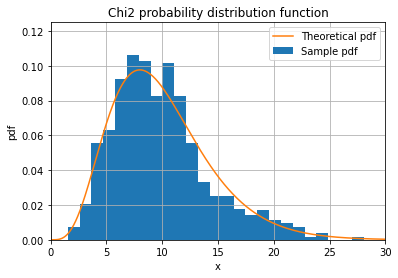

In [5]:
# ------------------------------ #
# Construction of a histogram of
# the sample and a graph of the
# theoretical density of a random variable
# ------------------------------ #

# Histogram of the sample
plt.hist(distr, bins=30, density=True, label='Sample pdf')

# Histogram of the theoretical sample density
x = np.linspace(0, 30, N)
y = chi2_rv.pdf(x)
plt.plot(x, y, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 30, 0, 0.125])
plt.title('Chi2 probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()


Generation of 1000 samples with volume n = (5,10,50)...
[[ 8.57212983 11.16371663 11.30224973 ...  9.54450908 11.55356503
  10.02750669]
 [11.55728504  7.88743881 10.94075413 ... 10.88536896  8.45290803
  11.60988743]
 [ 9.26758197 10.61202453 10.06041094 ... 10.88334809  9.79258781
   9.89559161]]


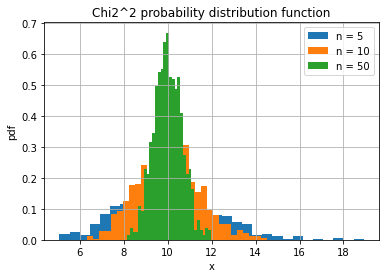

In [6]:
# ------------------------------ #
# Generation of 1000 samples with
# volume n = (5,10,50), construction
# of the histogram of distribution
# of its sample average
# ------------------------------ #

sample_Vol = [5, 10, 50]

# the null array is created for a sample mean
dist_sle = np.zeros((len(sample_Vol), N))

# finding the sample mean and entering it in the zero array
for i in range(len(sample_Vol)):
    for j in range(N):
        dist_sle_t = np.array(sts.chi2.rvs(k, size=sample_Vol[i]))
        dist_sle_t_m = dist_sle_t.mean()
        dist_sle[i, j] = dist_sle_t_m

print('\nGeneration of 1000 samples with volume n = (5,10,50)...')
print(dist_sle)

# histograms of the sample
for i in range(len(sample_Vol)):
    plt.hist(dist_sle[i], bins=30, density=True, label='n = ' + str(sample_Vol[i]))
    plt.grid()
    plt.axis()
    plt.title('Chi2^2 probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
plt.show()

In [7]:
# ------------------------------ #
# Finding the parameters of normal
# distributions that approximate
# by the central limit theorem
# distribution of sample averages
# ------------------------------ #


# Mathematical expectation and variance (from Wiki: k, 2k)
print('\nMathematical expectation and variance...')
dist_sle_t_m = k
dist_sle_v = np.zeros(len(sample_Vol))
for i in range(len(sample_Vol)):
    dist_sle_v[i] = 2 * k / sample_Vol[i]

print('Mathematical expectation: ' + str(dist_sle_t_m))
for i in range(len(sample_Vol)):
    print('Variance for n = {0}: {1}'.format(sample_Vol[i], dist_sle_v[i]))


Mathematical expectation and variance...
Mathematical expectation: 10
Variance for n = 5: 4.0
Variance for n = 10: 2.0
Variance for n = 50: 0.4


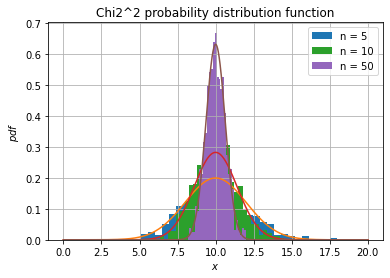

In [8]:
# ------------------------------ #
# Images of corresponding densities
# normal floor distributions
# all relevant histograms
# ------------------------------ #

# general histogram
for i in range(len(sample_Vol)):
    # histogram of the distribution of the sample mean
    plt.hist(dist_sle[i], bins=30, density=True, label='n = {}'.format(sample_Vol[i]))
    plt.grid()
    plt.axis()
    plt.title('Chi2^2 probability distribution function')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$pdf$')

    # normal distribution of random variables
    mu = dist_sle_t_m
    sigma = sqrt(dist_sle_v[i])
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 20, N)
    y = norm_rv.pdf(x)
    plt.plot(x, y)

plt.show()

In [9]:
def res():
    """\nConclusions:
The normal distribution exhaustively describes the distribution of the sample means, thus confirming the central limit theorem.
As [n] increases, the approximation accuracy of the normal distribution of the heart increases.
"""
    pass

if __name__ == '__main__':
    print(res.__doc__.upper())


CONCLUSIONS:
THE NORMAL DISTRIBUTION EXHAUSTIVELY DESCRIBES THE DISTRIBUTION OF THE SAMPLE MEANS, THUS CONFIRMING THE CENTRAL LIMIT THEOREM.
AS [N] INCREASES, THE APPROXIMATION ACCURACY OF THE NORMAL DISTRIBUTION OF THE HEART INCREASES.

